In [1]:
import pandas as pd

In [10]:
df=pd.read_excel("Data_Train.xlsx")

FLIGHT PRICE PREDICTION : PREDICTING FLIGHT PRICES BASED ON PREVIOUS JOURNEYS

DATASET : 10,000 OBSERVATIONS BASED ON 11 COLUMNS

OBJECTIVE : 

TO PREDICT FLIGHT PRICE BASED ON CUSTOMER NEEDS 

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# We can see that few dimensions which are of object types need to be converted into numeric/continuous.
-> Airline , Date_of_Journey , Source , Destination , Route , Dep_Time , Arrival_Time , Duration , Total_Stops

# DATA PREPARATION

In [8]:
k=df["Date_of_Journey"].str.split("/",expand=True).astype(int)

In [9]:
k

,0,1,2
0,24,3,2019
1,1,5,2019
2,9,6,2019
3,12,5,2019
4,1,3,2019
5,24,6,2019
6,12,3,2019
7,1,3,2019
8,12,3,2019
9,27,5,2019


In [345]:
df["month"]=k[1]
df["day"]=k[0]

In [346]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [347]:
df=df.drop("Date_of_Journey",axis=1)

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [349]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [350]:
df["Total_Stops"]=df["Total_Stops"].replace("non-stop","0")
df["Total_Stops"]=df["Total_Stops"].str.replace("stops","")
df["Total_Stops"]=df["Total_Stops"].str.replace("stop","")

In [351]:
df["Total_Stops"].value_counts()

1     5625
0     3491
2     1520
3       45
4        1
Name: Total_Stops, dtype: int64

In [352]:
df["Total_Stops"]=pd.to_numeric(df["Total_Stops"])

In [353]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops        float64
Additional_Info     object
Price                int64
month                int32
day                  int32
dtype: object

In [354]:
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [12]:
df=df.drop("Additional_Info",axis=1)

In [356]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,13302,3,1


In [357]:
df.shape

(10683, 11)

In [358]:
df["Dep_Time"].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:15      1
12:45      1
04:50      1
21:35      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [359]:
df["Arrival_Time"].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:40 07 May      1
03:35 02 May      1
23:00 22 Mar      1
22:40 07 Jun      1
00:25 19 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [360]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
36h 25m      1
30h 10m      1
19h 50m      1
3h 25m       1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [361]:
df.dtypes

Airline          object
Source           object
Destination      object
Route            object
Dep_Time         object
Arrival_Time     object
Duration         object
Total_Stops     float64
Price             int64
month             int32
day               int32
dtype: object

In [362]:
cat_cols=["Airline","Source","Destination"]

In [363]:
from sklearn import preprocessing

In [364]:
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 

df_category=  df[cat_cols].apply(le.fit_transform)


In [365]:
df_category.head()

,Airline,Source,Destination
0,3,0,5
1,1,3,0
2,4,2,1
3,3,3,0
4,3,0,5


In [366]:
df=df.drop(cat_cols,axis=1)

In [367]:
df=pd.concat([df,df_category],axis=1)

In [368]:
df.head()

,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,month,day,Airline,Source,Destination
0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,3897,3,24,3,0,5
1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,7662,5,1,1,3,0
2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,13882,6,9,4,2,1
3,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,6218,5,12,3,3,0
4,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,13302,3,1,3,0,5


In [13]:
n=df["Dep_Time"].str.split(":",expand=True).astype(int)

In [14]:
df["Dep_Time_Hours"]=n[0]
df["Dep_Time_Minutes"]=n[1]

In [15]:
df=df.drop("Dep_Time",axis=1)

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Dep_Time_Hours,Dep_Time_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,16,50


In [17]:
m=df["Arrival_Time"].str.split(" ",expand=True)

In [18]:
m.head()

,0,1,2
0,01:10,22,Mar
1,13:15,None,None
2,04:25,10,Jun
3,23:30,None,None
4,21:35,None,None


In [19]:
l=m[0].str.split(":",expand=True).astype(int)

In [20]:
l.head()

,0,1
0,1,10
1,13,15
2,4,25
3,23,30
4,21,35


In [21]:
df["Arrival_Time_hours"]=l[0]
df["Arrival_Time_minutes"]=l[1]
df["Arrival_Time_day"]=m[1]
df["Arrival_Time_month"]=m[2]

In [22]:
df=df.drop("Arrival_Time",axis=1)

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_hours,Arrival_Time_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,16,50,21,35


In [24]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 10m      1
37h 10m      1
3h 25m       1
13h 35m      1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

In [25]:
df["Duration"]=df["Duration"].str.replace("h","")
df["Duration"]=df["Duration"].str.replace("m","")

In [26]:
df["Duration"].value_counts()

2 50     550
1 30     386
2 55     337
2 45     337
2 35     329
        ... 
41 20      1
29 30      1
30 25      1
47 40      1
28 30      1
Name: Duration, Length: 367, dtype: int64

In [27]:
p=df["Duration"].str.split(" ",expand=True)

In [28]:
p.head()

,0,1
0,2,50
1,7,25
2,19,None
3,5,25
4,4,45


In [29]:
df["Duration_hours"]=p[0]
df["Duration_minutes"]=p[1]

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_hours,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2 50,non-stop,3897,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7 25,2 stops,7662,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19,2 stops,13882,9,25,4,25,19,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5 25,1 stop,6218,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4 45,1 stop,13302,16,50,21,35,4,45


In [388]:
df["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → RPR → HYD → BLR             1
CCU → IXA → BLR                   1
BOM → RPR → VTZ → HYD             1
BOM → JDH → JAI → DEL → HYD       1
CCU → IXB → DEL → BLR             1
Name: Route, Length: 128, dtype: int64

In [389]:
df["Route"]=df["Route"].astype(str)

In [390]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [391]:
from sklearn.preprocessing import LabelEncoder 

In [392]:

le = LabelEncoder()

In [393]:
df['Route']=le.fit_transform(df['Route'])

In [394]:
df["Route"].head()

0     18
1     84
2    118
3     91
4     29
Name: Route, dtype: int32

In [395]:
df.dtypes

Route                     int32
Duration                 object
Total_Stops             float64
Price                     int64
month                     int32
day                       int32
Airline                   int32
Source                    int32
Destination               int32
Dep_Time_Hours            int32
Dep_Time_Minutes          int32
Arrival_Time_hours        int32
Arrival_Time_minutes      int32
Arrival_Time_day         object
Arrival_Time_month       object
Duration_hours           object
Duration_minutes         object
dtype: object

In [396]:
df.head()

,Route,Duration,Total_Stops,Price,month,day,Airline,Source,Destination,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_hours,Arrival_Time_minutes,Arrival_Time_day,Arrival_Time_month,Duration_hours,Duration_minutes
0,18,2 50,0.0,3897,3,24,3,0,5,22,20,1,10,22,Mar,2,50
1,84,7 25,2.0,7662,5,1,1,3,0,5,50,13,15,None,None,7,25
2,118,19,2.0,13882,6,9,4,2,1,9,25,4,25,10,Jun,19,None
3,91,5 25,1.0,6218,5,12,3,3,0,18,5,23,30,None,None,5,25
4,29,4 45,1.0,13302,3,1,3,0,5,16,50,21,35,None,None,4,45


In [397]:
df=df.replace("None",0)

In [398]:
df.isna().sum()

Route                      0
Duration                   0
Total_Stops                1
Price                      0
month                      0
day                        0
Airline                    0
Source                     0
Destination                0
Dep_Time_Hours             0
Dep_Time_Minutes           0
Arrival_Time_hours         0
Arrival_Time_minutes       0
Arrival_Time_day        6348
Arrival_Time_month      6348
Duration_hours             0
Duration_minutes        1032
dtype: int64

In [399]:
df.drop(['Arrival_Time_day','Arrival_Time_month','Duration'],axis=1,inplace=True)

In [400]:
df.dtypes

Route                     int64
Total_Stops             float64
Price                     int64
month                     int64
day                       int64
Airline                   int64
Source                    int64
Destination               int64
Dep_Time_Hours            int64
Dep_Time_Minutes          int64
Arrival_Time_hours        int64
Arrival_Time_minutes      int64
Duration_hours           object
Duration_minutes         object
dtype: object

In [401]:
df['Duration_hours']=pd.to_numeric(df['Duration_hours'])
df['Duration_minutes']=pd.to_numeric(df['Duration_minutes'])

In [402]:
df.head()

,Route,Total_Stops,Price,month,day,Airline,Source,Destination,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_hours,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,18,0.0,3897,3,24,3,0,5,22,20,1,10,2,50.0
1,84,2.0,7662,5,1,1,3,0,5,50,13,15,7,25.0
2,118,2.0,13882,6,9,4,2,1,9,25,4,25,19,NaN
3,91,1.0,6218,5,12,3,3,0,18,5,23,30,5,25.0
4,29,1.0,13302,3,1,3,0,5,16,50,21,35,4,45.0


In [403]:
df.dtypes

Route                     int64
Total_Stops             float64
Price                     int64
month                     int64
day                       int64
Airline                   int64
Source                    int64
Destination               int64
Dep_Time_Hours            int64
Dep_Time_Minutes          int64
Arrival_Time_hours        int64
Arrival_Time_minutes      int64
Duration_hours            int64
Duration_minutes        float64
dtype: object

In [404]:
df.isnull().sum()

Route                      0
Total_Stops                1
Price                      0
month                      0
day                        0
Airline                    0
Source                     0
Destination                0
Dep_Time_Hours             0
Dep_Time_Minutes           0
Arrival_Time_hours         0
Arrival_Time_minutes       0
Duration_hours             0
Duration_minutes        1032
dtype: int64

In [405]:
df.dropna(inplace=True)

In [406]:
df.isna().sum()

Route                   0
Total_Stops             0
Price                   0
month                   0
day                     0
Airline                 0
Source                  0
Destination             0
Dep_Time_Hours          0
Dep_Time_Minutes        0
Arrival_Time_hours      0
Arrival_Time_minutes    0
Duration_hours          0
Duration_minutes        0
dtype: int64

In [407]:
df.dtypes

Route                     int64
Total_Stops             float64
Price                     int64
month                     int64
day                       int64
Airline                   int64
Source                    int64
Destination               int64
Dep_Time_Hours            int64
Dep_Time_Minutes          int64
Arrival_Time_hours        int64
Arrival_Time_minutes      int64
Duration_hours            int64
Duration_minutes        float64
dtype: object

In [408]:
df.head()

,Route,Total_Stops,Price,month,day,Airline,Source,Destination,Dep_Time_Hours,Dep_Time_Minutes,Arrival_Time_hours,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,18,0.0,3897,3,24,3,0,5,22,20,1,10,2,50.0
1,84,2.0,7662,5,1,1,3,0,5,50,13,15,7,25.0
3,91,1.0,6218,5,12,3,3,0,18,5,23,30,5,25.0
4,29,1.0,13302,3,1,3,0,5,16,50,21,35,4,45.0
5,64,0.0,3873,6,24,8,3,0,9,0,11,25,2,25.0


# MODELLING

In [409]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [410]:
x.shape

(9650, 13)

# OLS MODEL

In [411]:
import statsmodels.api as sm
X=sm.add_constant(x_train)
lm = sm.OLS(y_train, X).fit()

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [412]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     409.6
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:46:49   Log-Likelihood:                -64772.
No. Observations:                6755   AIC:                         1.296e+05
Df Residuals:                    6741   BIC:                         1.297e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9528.8926 

# CHECKING FOR LINEAR ASSUMPTIONS

# 1.NO AUTO CORRELATION

DURBIN-WATSON : 2.030 (closer to 2 , no auto correlation)
    
  NO AUTO CORRELAION
    
[


DB=2 , NO AUTO CORRELATION
DB<2 : CLOSER TO 0 , POSITIVE AUTO CORRELATION
DB>2 : CLOSER TO 4 , NEGATIVE AUTO CORRELATION

The test statistic is equal to 2*(1-r) where r is the sample autocorrelation of the residuals.

Thus for r==0 indicating no serial correlation, the test statistic equals 2.

Closer to 0, more evidence for positive serial correlation and closer to 4 indicates negative serial correlation.

]

# 2.NO MULTICOLLINEARITY

-> OLS MODEL DOES NOT THROW [ WARNING : PRESENCE OF MULTICOLLINEARITY ]

    SO NO MULTI COLLINEARITY

-> CHECKING MULTICOLLINEARITY WITH HEAT MAP

-> VIF

# 3.NO HETEROSKEDASTICITY

->BREUSH-PAGON TEST

->GOLDFIELD QUANDT TEST


Null Hypothesis - The Data is HOMOSCEDASTIC (Uniform Variance)

Alternate Hypothesis - Data is HETEROSCEDASTIC( Unequal Variance)

# GOLDFELD QUANDT TEST

In [413]:
from statsmodels.stats.api import linear_rainbow, het_goldfeldquandt,het_breuschpagan
het_goldfeldquandt(y, x)

(1.0261661031330567, 0.1851735694525106, 'increasing')

[f value , p value, increasing]

p value=0.185 greater than 0.05 = >failed to reject null hypothesis

accept null hypothesis : homoscedasticity

alternate hypothesis is false

(no heteroskedasticity)

# NORMALITY

Null Hypothesis - The Data is following the Gaussian pattern

Alternate Hypothesis - Data is not following the Gaussian Pattern

# SHAPIRO WILK TEST

In [414]:
from scipy.stats import shapiro
shapiro(lm.resid)
#shapiro(x)

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8414677381515503, 0.0)

In [415]:
x.shape

(9650, 13)

In [416]:
from scipy.stats import anderson
anderson(lm.resid, dist='norm')

AndersonResult(statistic=110.17703495291153, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [417]:
from scipy.stats import kstest
kstest(lm.resid, 'norm')

KstestResult(statistic=0.5683195811513354, pvalue=0.0)

[fvalue,pvalue] 

pvalue : lesser than 0.05 : reject null hypothesis

alternate hypothesis : true
    
so data is not normal


# QQPLOT

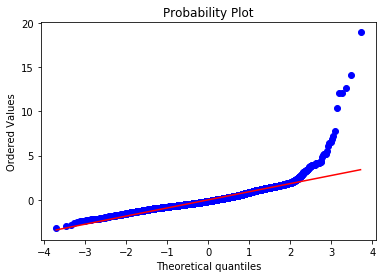

In [418]:
# QQ Plot - Showing that the residuals are not normal
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

# Finding the Values
fittedvalues = lm.fittedvalues
residuals = lm.resid
st_residual = lm.get_influence().resid_studentized_internal

stats.probplot(st_residual, dist="norm", plot=pylab)
plt.show()

# LINEARITY 

1. RAINBOW TEST

2. RESIDUAL PLOT

# RAINBOW TEST

Null Hypothesis - The Data is following the linear pattern

Alternate Hypothesis - Data is not following the Linear Pattern

In [419]:
linear_rainbow(lm)

(0.7497367696583679, 0.9999999999999999)

[fvalue , pvalue]

pvalue=0.9 > 0.05 : failed to reject null hypothesis
    
accept null hypothesis

alternate hypothesis : false

(linearity)

# RESIDUAL PLOT 

-> IF RESIDUALS ARE SCATTERED , LINEAR

-> IF RESIDUALS FOLLOW A PATTERN , NOT LINEAR

In [420]:
fittedvalues = lm.fittedvalues
residuals = lm.resid
st_residual = lm.get_influence().resid_studentized_internal

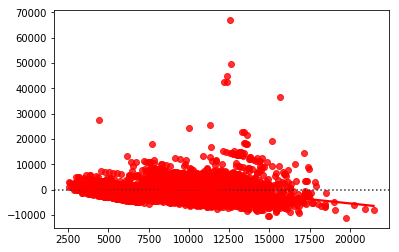

In [421]:
# Residual Plot
import seaborn as sns
sns.residplot(fittedvalues, residuals, color="r", lowess=True)

SO AMONG ALL ASSUMPTIONS , ATLEAST 3 ASSUMPTIONS ARE SATISFIED

    NO AUTO CORRELATION - PROVED
    NO MULTI COLLINEARITY - PROVED
    NO HETEROSCEDASTICITY - PROVED
    NORMALITY - FAILED
    LINEARITY - FAILED(FROM RESIDUAL PLOT)

# LINEAR REGRESSION

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                        test_size=0.3, random_state=0) 

In [424]:
from sklearn.linear_model import LinearRegression

In [425]:
lm=LinearRegression()

In [426]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [427]:
y_pred=lm.predict(x_test)

In [428]:
y_pred

array([ 3823.08091221,  9343.5603587 , 10529.13645143, ...,
       11836.7859605 , 10779.83520613,  4902.24407075])

In [429]:
lm.intercept_

9528.89258133158

In [430]:
list(zip(x_train.columns,lm.coef_))

[('Route', -12.600038252083325),
 ('Total_Stops', 4090.676149501717),
 ('month', -475.72566434114333),
 ('day', -83.79656331710534),
 ('Airline', 177.4860518523716),
 ('Source', -269.1357082423268),
 ('Destination', 47.34787100709656),
 ('Dep_Time_Hours', 41.33886279881825),
 ('Dep_Time_Minutes', -2.5020339570698953),
 ('Arrival_Time_hours', -15.088284242395837),
 ('Arrival_Time_minutes', -7.085021013578832),
 ('Duration_hours', 65.34459445539567),
 ('Duration_minutes', -16.72992719974678)]

In [431]:
y_pred_train=lm.predict(x_train)

In [432]:
import numpy as np

In [433]:
from sklearn.metrics import mean_squared_error,r2_score

In [434]:
mse=mean_squared_error(y_train, y_pred_train)
r_squared=r2_score(y_train,y_pred_train)

In [435]:
print("TRAINING ERROR AND R2 SCORE")
print("MSE : {}".format(mse))
print("RMSE : {}".format(np.sqrt(mse)))
print("R2 SCORE : {}".format(r_squared))


TRAINING ERROR AND R2 SCORE
MSE : 12478759.648649167
RMSE : 3532.5287895004008
R2 SCORE : 0.4413249843137593


In [436]:
mse=mean_squared_error(y_test, y_pred)
r_squared=r2_score(y_test,y_pred)

In [437]:
print("TEST ERROR AND R2 SCORE")
print("MSE : {}".format(mse))
print("RMSE : {}".format(np.sqrt(mse)))
print("R2 SCORE : {}".format(r_squared))

TEST ERROR AND R2 SCORE
MSE : 10749794.168331513
RMSE : 3278.6878729655728
R2 SCORE : 0.4698626197530438


In [438]:
from sklearn.metrics import mean_absolute_error

In [439]:
mean_absolute_error(y_test,y_pred)

2404.2711432498354

# LASSO AND RIDGE REGRESSION

In [440]:
import numpy as np

In [441]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [442]:
lambdas=np.linspace(1,100,100)

In [443]:
params={'alpha':lambdas}

In [444]:
model=Ridge(fit_intercept=True)

In [445]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring="neg_mean_absolute_error")

In [446]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.]

In [447]:
grid_search.best_estimator_

Ridge(alpha=47.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [448]:
ridge_model=grid_search.best_estimator_

In [449]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=47.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [450]:
list(zip(x_train.columns,ridge_model.coef_))

[('Route', -11.93517874782875),
 ('Total_Stops', 3935.1393900981784),
 ('month', -474.7018155806444),
 ('day', -83.90966469466268),
 ('Airline', 172.53304108056793),
 ('Source', -272.1301843551635),
 ('Destination', 43.93923033735648),
 ('Dep_Time_Hours', 40.382583715752425),
 ('Dep_Time_Minutes', -2.366132515932347),
 ('Arrival_Time_hours', -15.084343293244567),
 ('Arrival_Time_minutes', -7.266189626106059),
 ('Duration_hours', 73.3381140196722),
 ('Duration_minutes', -16.70843882181484)]

In [451]:
ytrainpred_ridge=ridge_model.predict(x_train)

In [452]:
ytrainpred_ridge

array([10342.3052821 ,  4562.48892272,  5749.63331217, ...,
        7550.41470373,  8801.5654878 ,  9386.93388966])

In [453]:
ypred_ridge=ridge_model.predict(x_test)

In [454]:
ypred_ridge

array([ 3876.64243058,  9405.10063081, 10608.62262263, ...,
       11810.11848285, 10772.48058651,  4931.81458688])

In [455]:
mse=mean_squared_error(y_test,ypred_ridge)
r2=r2_score(y_test,ypred_ridge)
r2_train=r2_score(y_train,ytrainpred_ridge)

In [456]:
print("Mean squared error : ",mse)
print("RMSE : {}".format(np.sqrt(mse)))
print("Train_r2_score : ",r2_train)
print("Test_r2_score : ",r2)

Mean squared error :  10747064.339838155
RMSE : 3278.2715476052554
Train_r2_score :  0.4411342878234261
Test_r2_score :  0.4699972441098762


In [457]:
#lasso

In [458]:
lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={"alpha":lambdas}

In [459]:
grid_search1=GridSearchCV(model,param_grid=params,cv=10,scoring="neg_mean_absolute_error")

In [460]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.5454...
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolu

In [461]:
lasso_model=grid_search1.best_estimator_

In [462]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [463]:
y_pred_lasso=lasso_model.predict(x_test)

In [464]:
mse=mean_squared_error(y_test,y_pred_lasso)
r2=r2_score(y_test,y_pred_lasso)


In [465]:
print("Mean squared error : ",mse)
print("RMSE : {}".format(np.sqrt(mse)))
print("r2_score : ",r2)

Mean squared error :  10747904.461357966
RMSE : 3278.399679928908
r2_score :  0.4699558126355031


# DECISION TREE REGRESSION

In [466]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [467]:
ytrainpred_dt=DT.predict(x_train)

In [468]:
ytrainpred_dt

array([ 9087.43046358,  5223.67346939,  4901.54285714, ...,
        2851.        ,  7552.6328125 , 11897.17714286])

In [469]:
ypred_dt=DT.predict(x_test)

In [470]:
mse=mean_squared_error(y_test,ypred_dt)
r2=r2_score(y_test,ypred_dt)
r2_train=r2_score(y_train,ytrainpred_dt)

In [471]:
print("Mean squared error : ",mse)
print("RMSE : {}".format(np.sqrt(mse)))
print("Train_r2_score : ",r2_train)
print("Test_r2_score : ",r2)

Mean squared error :  6653672.946410984
RMSE : 2579.4714471013212
Train_r2_score :  0.6533817630218031
Test_r2_score :  0.6718671362823079


# RANDOM FOREST REGRESSION

In [472]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

In [473]:
RF = RandomForestRegressor(max_depth=8, min_samples_leaf=150)

In [474]:
RF.fit(x_train,y_train)

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=150, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [475]:
ytrainpred_RF=RF.predict(x_train)

In [476]:
ytrainpred_RF

array([10117.45042205,  4998.53840674,  4991.50340891, ...,
        4978.5164177 ,  7923.56512396, 12111.13818439])

In [477]:
ypred_RF=RF.predict(x_test)

In [478]:
ypred_RF

array([ 4645.0903113 , 11493.80328138, 11999.74470825, ...,
       11659.68668806, 11748.42176587,  5080.53451988])

In [479]:
from math import sqrt

In [480]:
mse=mean_squared_error(y_test,ypred_RF)
rmse=sqrt(mean_squared_error(y_test,ypred_RF))
r2=r2_score(y_test,ypred_RF)
r2_train=r2_score(y_train,ytrainpred_RF)

In [481]:
print("Mean squared error : ",mse)
print("Train_r2_score : ",r2_train)
print("Test_r2_score : ",r2)
print("rmse : ",rmse)

Mean squared error :  8399096.78666341
Train_r2_score :  0.5851480125396811
Test_r2_score :  0.5857897279522076
rmse :  2898.1195259449546


In [482]:
bag = BaggingRegressor()

In [483]:
bag.fit(x_train,y_train)
pred_bag = bag.predict(x_test)


In [484]:
print("r2_score_test::",r2_score(y_true=y_test, y_pred=pred_bag))
print("mae::",mean_absolute_error(y_test,pred_bag))
print("mse::",mean_squared_error(y_test,pred_bag))
print("rmse::",np.sqrt(mean_squared_error(y_test,pred_bag)))

r2_score_test:: 0.8103099315138543
mae:: 1150.3264211832113
mse:: 3846416.5478255423
rmse:: 1961.2283262857343


# FROM THE ABOVE MODELS WE CAN COME TO A CONCLUSION THAT , BAGGING REFRESSOR MODEL GIVES THE BETTER ACCURACY OF 81% WITH MINIMIZED RMSE. FURTHER TUNING OF THESE MODELS MAY RBY REDUCING THE ERROR MAY RESULT IN HIGHER MODEL ACCURACY